In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.shape

(568454, 10)

In [6]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [7]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dropna(subset=['ProfileName', 'Summary'], inplace=True)

In [10]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568401 non-null  int64 
 1   ProductId               568401 non-null  object
 2   UserId                  568401 non-null  object
 3   ProfileName             568401 non-null  object
 4   HelpfulnessNumerator    568401 non-null  int64 
 5   HelpfulnessDenominator  568401 non-null  int64 
 6   Score                   568401 non-null  int64 
 7   Time                    568401 non-null  int64 
 8   Summary                 568401 non-null  object
 9   Text                    568401 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [12]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568401.000000,568401.000000,568401.000000,568401.000000,5.684010e+05
mean,284228.120582,1.743903,2.227911,4.183297,1.296261e+09
std,164098.955187,7.636845,8.288820,1.310376,4.803804e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142116.000000,0.000000,0.000000,4.000000,1.271290e+09
50%,284225.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426342.000000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


In [13]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [16]:
df['text_combined'] = df['Summary'] + " " + df['Text']

In [17]:
def prep(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stop_words]  
    words = [stemmer.stem(w) for w in words] 
    return " ".join(words)

df['clean_text'] = df['text_combined'].apply(prep)

In [18]:
def score_to_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'Positive'

df['sentiment'] = df['Score'].apply(score_to_sentiment)

In [19]:
df[['clean_text', 'sentiment']]

,clean_text,sentiment
0,good qualiti dog food bought sever vital can d...,Positive
1,advertis product arriv label jumbo salt peanut...,negative
2,delight say confect around centuri light pillo...,Positive
3,cough medicin look secret ingredi robitussin b...,negative
4,great taffi great taffi great price wide assor...,Positive
...,...,...
568449,without great sesam chickenthi good better res...,Positive
568450,disappoint im disappoint flavor chocol note es...,negative
568451,perfect maltipoo star small give one train ses...,Positive
568452,favorit train reward treat best treat train re...,Positive


In [20]:
df['sentiment'].value_counts()

sentiment
Positive    443756
negative     82007
neutral      42638
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

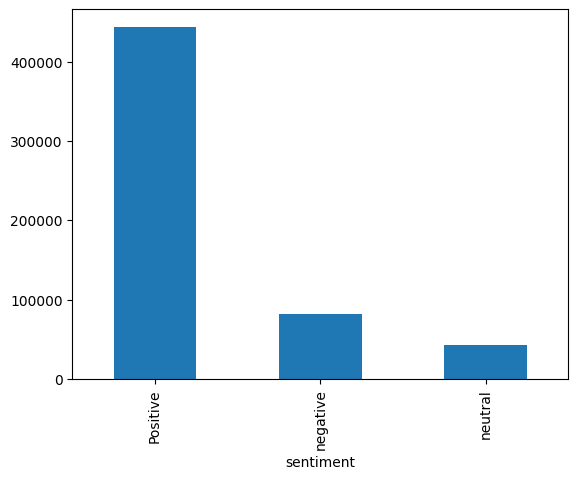

In [21]:
df['sentiment'].value_counts().plot(kind='bar')

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [23]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']  

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y) 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [26]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
clf = LogisticRegression(max_iter=400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 88.10091396099612


In [29]:
def predict_sentiment(text):
    text = prep(text)
    vec = vectorizer.transform([text])
    pred = clf.predict(vec) 
    label = le.inverse_transform(pred)
    return label[0]

print(predict_sentiment("This product is amazing and totally worth it!"))

Positive


In [31]:
print(df['sentiment'].unique())

['Positive' 'negative' 'neutral']


In [32]:
df['sentiment'] = df['sentiment'].str.lower().str.strip()
df.to_csv("sentiment_cleaned.csv", index=False)

In [33]:
print(df['sentiment'].unique())

['positive' 'negative' 'neutral']


In [34]:
import joblib

joblib.dump(clf, 'sentiment_model.pkl') 
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')  

['label_encoder.pkl']